In [ ]:
from pathlib import Path

datasets_path = Path("/content/datasets")
rail_path = datasets_path / "railsem19"

if rail_path.exists():
    print(f"{rail_path} Path exists")
else:
    print(f"{rail_path} Path doesnt exist.. Creating One!")
    rail_path.mkdir(parents=True, exist_ok=True)

/content/datasets/railsem19 Path doesnt exist.. Creating One!


In [ ]:
# !wget https://www.wilddash.cc/download/rs19_splits4000.zip
# !wget https://www.wilddash.cc/download/rs19_val.zip
#not working.. as it require license agreement. so Uploaded the manually downloaded zip files to drive and accessed from drive

--2024-01-10 21:05:58--  https://www.wilddash.cc/download/rs19_splits4000.zip
Resolving www.wilddash.cc (www.wilddash.cc)... 62.218.45.80
Connecting to www.wilddash.cc (www.wilddash.cc)|62.218.45.80|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: http://www.wilddash.cc/accounts/login?next=/download/rs19_splits4000.zip [following]
--2024-01-10 21:05:58--  http://www.wilddash.cc/accounts/login?next=/download/rs19_splits4000.zip
Connecting to www.wilddash.cc (www.wilddash.cc)|62.218.45.80|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.wilddash.cc/accounts/login?next=/download/rs19_splits4000.zip [following]
--2024-01-10 21:05:59--  https://www.wilddash.cc/accounts/login?next=/download/rs19_splits4000.zip
Connecting to www.wilddash.cc (www.wilddash.cc)|62.218.45.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7814 (7.6K) [text/html]
Saving to: ‘rs19_splits4000.zip’

rs19_split

In [ ]:
!rm -rf sample_data

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Colab\ Notebooks/Master\ Thesis/Data/railsem19/rs19_splits4000 -d ./datasets/railsem19
!echo "Dataset Extracted."

Archive:  /content/drive/MyDrive/Colab Notebooks/Master Thesis/Data/railsem19/rs19_splits4000.zip
  inflating: ./datasets/railsem19/test.txt  
  inflating: ./datasets/railsem19/train.txt  
  inflating: ./datasets/railsem19/val.txt  
Dataset Extracted.


In [ ]:
!unzip /content/drive/MyDrive/Colab\ Notebooks/Master\ Thesis/Data/railsem19/rs19_val.zip -d ./datasets/railsem19
!echo "Dataset Extracted."

Streaming output truncated to the last 5000 lines.
  inflating: ./datasets/railsem19/uint8/rs19_val/rs03501.png  
  inflating: ./datasets/railsem19/uint8/rs19_val/rs03502.png  
  inflating: ./datasets/railsem19/uint8/rs19_val/rs03503.png  
  inflating: ./datasets/railsem19/uint8/rs19_val/rs03504.png  
  inflating: ./datasets/railsem19/uint8/rs19_val/rs03505.png  
  inflating: ./datasets/railsem19/uint8/rs19_val/rs03506.png  
  inflating: ./datasets/railsem19/uint8/rs19_val/rs03507.png  
  inflating: ./datasets/railsem19/uint8/rs19_val/rs03508.png  
  inflating: ./datasets/railsem19/uint8/rs19_val/rs03509.png  
  inflating: ./datasets/railsem19/uint8/rs19_val/rs03510.png  
  inflating: ./datasets/railsem19/uint8/rs19_val/rs03511.png  
  inflating: ./datasets/railsem19/uint8/rs19_val/rs03512.png  
  inflating: ./datasets/railsem19/uint8/rs19_val/rs03513.png  
  inflating: ./datasets/railsem19/uint8/rs19_val/rs03514.png  
  inflating: ./datasets/railsem19/uint8/rs19_val/rs03515.png  
  in

In [ ]:
drive.flush_and_unmount()

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.4 MB/s eta 0:00:00


In [ ]:
import datasets
from datasets import Dataset, DatasetDict, Image
from PIL import Image as PILImage
import os
import json
import numpy as np


def create_rail_dataset_dict(data_root, split_text_files):
    dataset_dict = {"image": [], "annotation": [], "json":[], "split": []}
    splits = ["train", "val", "test"]
    #/content/datasets/railsem19/jpgs/rs19_val/rs00000.jpg
    #/content/datasets/railsem19/jsons/rs19_val/rs00000.json
    #/content/datasets/railsem19/uint8/rs19_val/rs00000.png
    for split in splits:
        image_dir = os.path.join(data_root, "jpgs", "rs19_val")
        annotation_dir = os.path.join(data_root, "uint8", "rs19_val")
        json_dir = os.path.join(data_root, "jsons", "rs19_val")

        # Get the set of images for the current split
        split_images = split_text_files.get(split, set())

        # Iterate over cities and images in the split
        for image_file in os.listdir(image_dir):
            # Check if the image is in the split's text file
            if os.path.splitext(image_file)[0] in split_images:
                image_path = os.path.join(image_dir, image_file)
                annotation_file = image_file.replace(".jpg", ".png")
                annotation_path = os.path.join(annotation_dir, annotation_file)
                json_file = image_file.replace(".jpg", ".json")
                json_path = os.path.join(json_dir, json_file)

                dataset_dict["image"].append(image_path)
                dataset_dict["annotation"].append(annotation_path)
                dataset_dict["json"].append(json_path)
                dataset_dict["split"].append(split)
    return dataset_dict


def read_split_text_file(file_path):
    with open(file_path, 'r') as file:
        return set(line.strip() for line in file)

# Paths to split-specific text files
train_text_file_path = "/content/datasets/railsem19/train.txt"
val_text_file_path = "/content/datasets/railsem19/val.txt"
test_text_file_path = "/content/datasets/railsem19/test.txt"

# Create a dictionary to map splits to their respective text files
split_text_files = {
    "train": read_split_text_file(train_text_file_path),
    "val": read_split_text_file(val_text_file_path),
    "test": read_split_text_file(test_text_file_path)
}
##print(split_text_files.get("val", set()))
#print(len(split_text_files.get("val", set())))

# Create DatasetDict for Cityscapes
data_root = "/content/datasets/railsem19"
rail_dataset_dict = create_rail_dataset_dict(data_root, split_text_files)

def create_dataset(image_paths, label_paths, json_paths):
    # Sort the list of JSON paths
    sorted_json_paths = sorted(json_paths)
    # Load each JSON file content
    loaded_json_contents = [json.load(open(json_path, "r")) for json_path in sorted_json_paths]

    dataset = Dataset.from_dict({"image": sorted(image_paths),
                                "semantic_mask_label": sorted(label_paths),
                                 "json": loaded_json_contents})
    dataset = dataset.cast_column("image", Image())
    dataset = dataset.cast_column("semantic_mask_label", Image())
    return dataset


train_dict = {k: [x for i, x in enumerate(v) if rail_dataset_dict['split'][i]=='train']
                                      for k, v in rail_dataset_dict.items()}
train_dataset = create_dataset(train_dict["image"], train_dict["annotation"],
                               train_dict["json"])
val_dict = {k: [x for i, x in enumerate(v) if rail_dataset_dict['split'][i]=='val']
                                      for k, v in rail_dataset_dict.items()}
val_dataset = create_dataset(val_dict["image"], val_dict["annotation"],
                             val_dict["json"])
test_dict = {k: [x for i, x in enumerate(v) if rail_dataset_dict['split'][i]=='test']
                                      for k, v in rail_dataset_dict.items()}
test_dataset = create_dataset(test_dict["image"], test_dict["annotation"],
                              test_dict["json"])

dataset = DatasetDict({
    "train": train_dataset,
    "validation": val_dataset,
    "test": test_dataset
})

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'semantic_mask_label', 'json'],
        num_rows: 3000
    })
    validation: Dataset({
        features: ['image', 'semantic_mask_label', 'json'],
        num_rows: 500
    })
    test: Dataset({
        features: ['image', 'semantic_mask_label', 'json'],
        num_rows: 500
    })
})

In [ ]:
dataset["train"].features

{'image': Image(decode=True, id=None),
 'semantic_mask_label': Image(decode=True, id=None),
 'json': {'frame': Value(dtype='string', id=None),
  'imgHeight': Value(dtype='int64', id=None),
  'imgWidth': Value(dtype='int64', id=None),
  'objects': [{'boundingbox': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None),
    'label': Value(dtype='string', id=None),
    'polygon': Sequence(feature=Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), length=-1, id=None),
    'polyline': Sequence(feature=Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), length=-1, id=None),
    'polyline-pair': Sequence(feature=Sequence(feature=Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), length=-1, id=None), length=-1, id=None)}]}}

In [ ]:
dataset["train"][0]["image"]

Output hidden; open in https://colab.research.google.com to view.

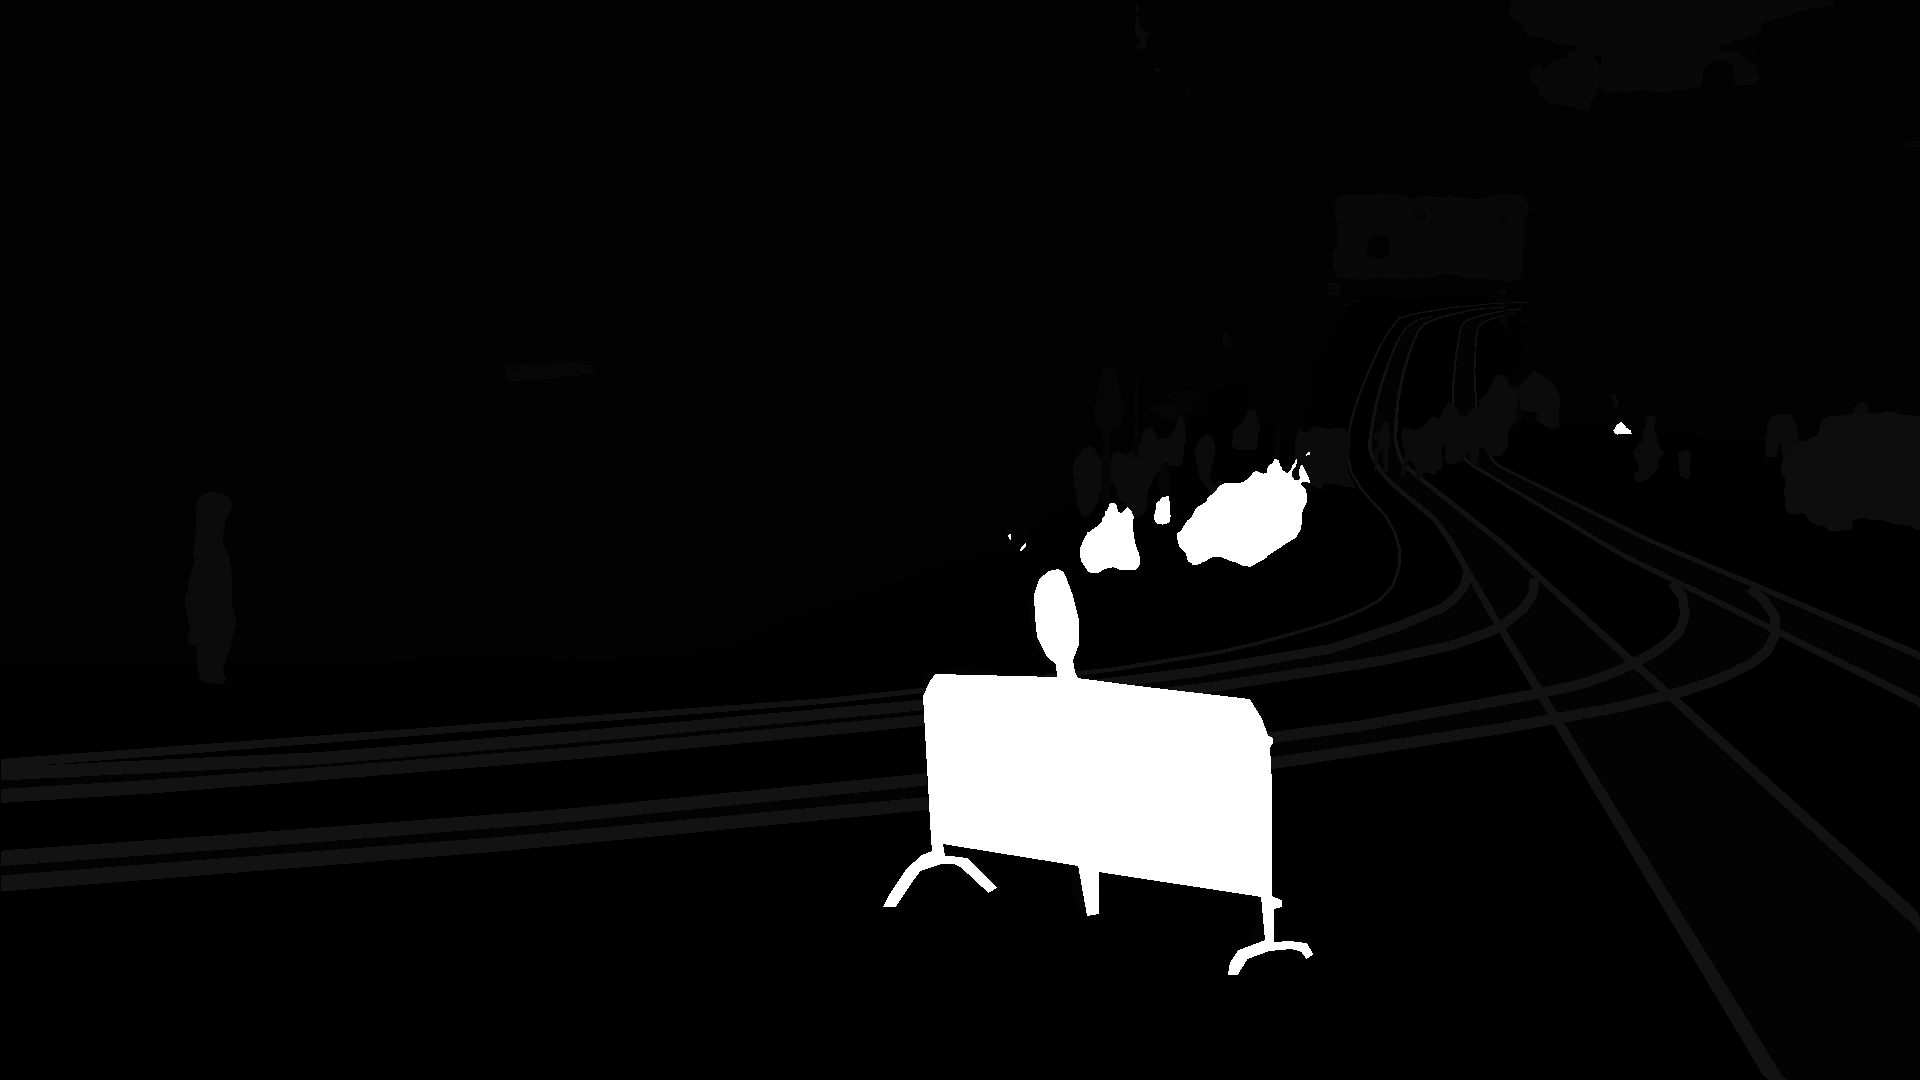

In [ ]:
dataset["train"][0]["semantic_mask_label"]

In [ ]:
import numpy as np

np.array(dataset["train"][0]["semantic_mask_label"]).shape, np.unique(np.array(dataset["train"][0]["semantic_mask_label"]))

((1080, 1920),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,  10,  11,  13,  18,
        255], dtype=uint8))

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
# Push to the Hugging Face Model Hub
dataset.push_to_hub("BhavanaMalla/railsem19-semantic-split355", private=True)

Uploading the dataset shards:   0%|          | 0/4 [00:00<?, ?it/s]

Map:   0%|          | 0/750 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/8 [00:00<?, ?ba/s]

Map:   0%|          | 0/750 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/8 [00:00<?, ?ba/s]

Map:   0%|          | 0/750 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/8 [00:00<?, ?ba/s]

Map:   0%|          | 0/750 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/8 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/5 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/5 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/BhavanaMalla/railsem19-semantic-split355/commit/7aa44d03f6b17d4c36759a18cb73dbe498e7458d', commit_message='Upload dataset', commit_description='', oid='7aa44d03f6b17d4c36759a18cb73dbe498e7458d', pr_url=None, pr_revision=None, pr_num=None)

**upload whole data without default splits(3k, 500, 500 splits)**

In [ ]:
import datasets
from datasets import Dataset, DatasetDict, Image
from PIL import Image as PILImage
import os
import json
import numpy as np


def create_rail_dataset_dict(data_root):
    dataset_dict = {"image": [], "annotation": [], "json":[]}
    #/content/datasets/railsem19/jpgs/rs19_val/rs00000.jpg
    #/content/datasets/railsem19/jsons/rs19_val/rs00000.json
    #/content/datasets/railsem19/uint8/rs19_val/rs00000.png
    image_dir = os.path.join(data_root, "jpgs", "rs19_val")
    annotation_dir = os.path.join(data_root, "uint8", "rs19_val")
    json_dir = os.path.join(data_root, "jsons", "rs19_val")

    # Iterate over cities and images in the split
    for image_file in os.listdir(image_dir):
        image_path = os.path.join(image_dir, image_file)
        annotation_file = image_file.replace(".jpg", ".png")
        annotation_path = os.path.join(annotation_dir, annotation_file)
        json_file = image_file.replace(".jpg", ".json")
        json_path = os.path.join(json_dir, json_file)

        dataset_dict["image"].append(image_path)
        dataset_dict["annotation"].append(annotation_path)
        dataset_dict["json"].append(json_path)
    return dataset_dict

# Create DatasetDict for Cityscapes
data_root = "/content/datasets/railsem19"
rail_dataset_dict = create_rail_dataset_dict(data_root)

def create_dataset(image_paths, label_paths, json_paths):
    # Sort the list of JSON paths
    sorted_json_paths = sorted(json_paths)
    # Load each JSON file content
    loaded_json_contents = [json.load(open(json_path, "r")) for json_path in sorted_json_paths]

    dataset = Dataset.from_dict({"image": sorted(image_paths),
                                "semantic_mask_label": sorted(label_paths),
                                 "json": loaded_json_contents})
    dataset = dataset.cast_column("image", Image())
    dataset = dataset.cast_column("semantic_mask_label", Image())
    return dataset

dataset = create_dataset(rail_dataset_dict["image"], rail_dataset_dict["annotation"],
                              rail_dataset_dict["json"])

dataset = DatasetDict({
    "data": dataset,
})

In [ ]:
dataset

DatasetDict({
    data: Dataset({
        features: ['image', 'semantic_mask_label', 'json'],
        num_rows: 8500
    })
})

In [ ]:
dataset["data"].features

{'image': Image(decode=True, id=None),
 'semantic_mask_label': Image(decode=True, id=None),
 'json': {'frame': Value(dtype='string', id=None),
  'imgHeight': Value(dtype='int64', id=None),
  'imgWidth': Value(dtype='int64', id=None),
  'objects': [{'boundingbox': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None),
    'label': Value(dtype='string', id=None),
    'polygon': Sequence(feature=Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), length=-1, id=None),
    'polyline': Sequence(feature=Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), length=-1, id=None),
    'polyline-pair': Sequence(feature=Sequence(feature=Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), length=-1, id=None), length=-1, id=None)}]}}

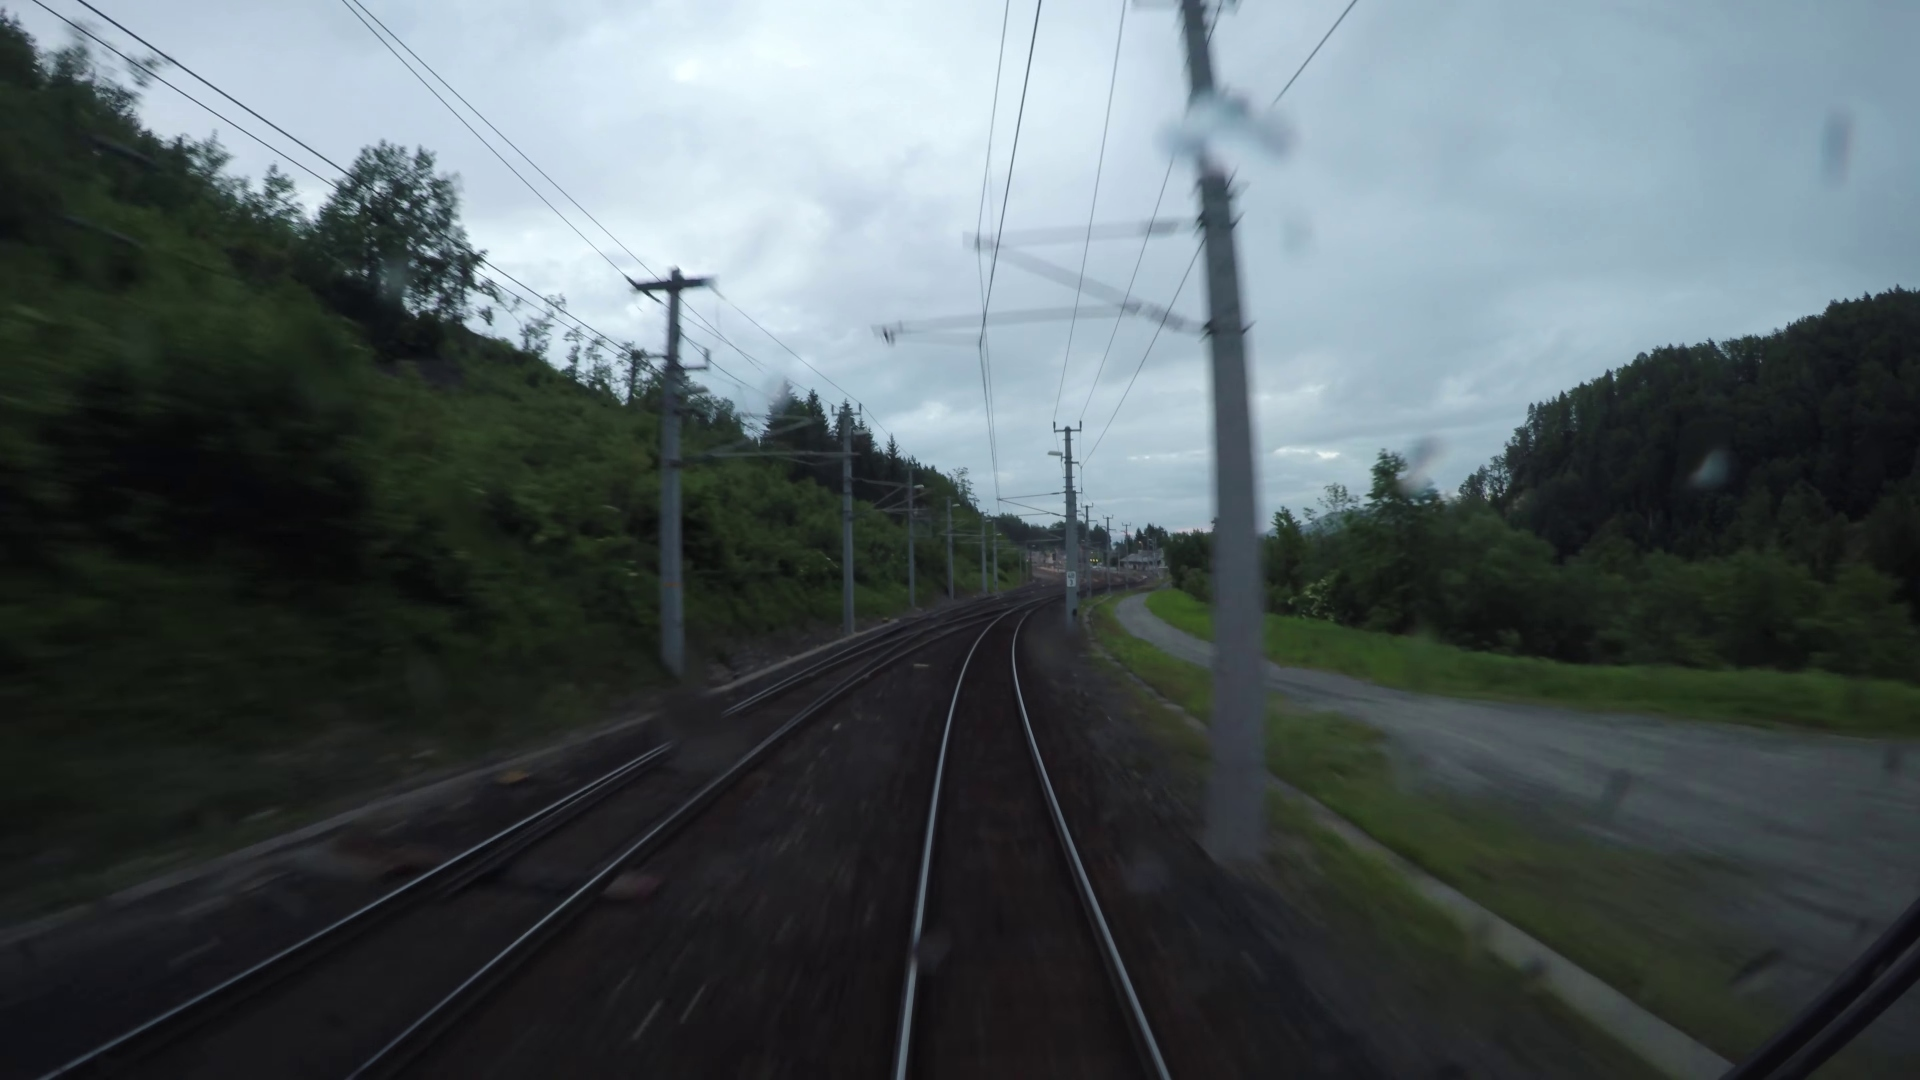

In [ ]:
dataset["data"][0]["image"]

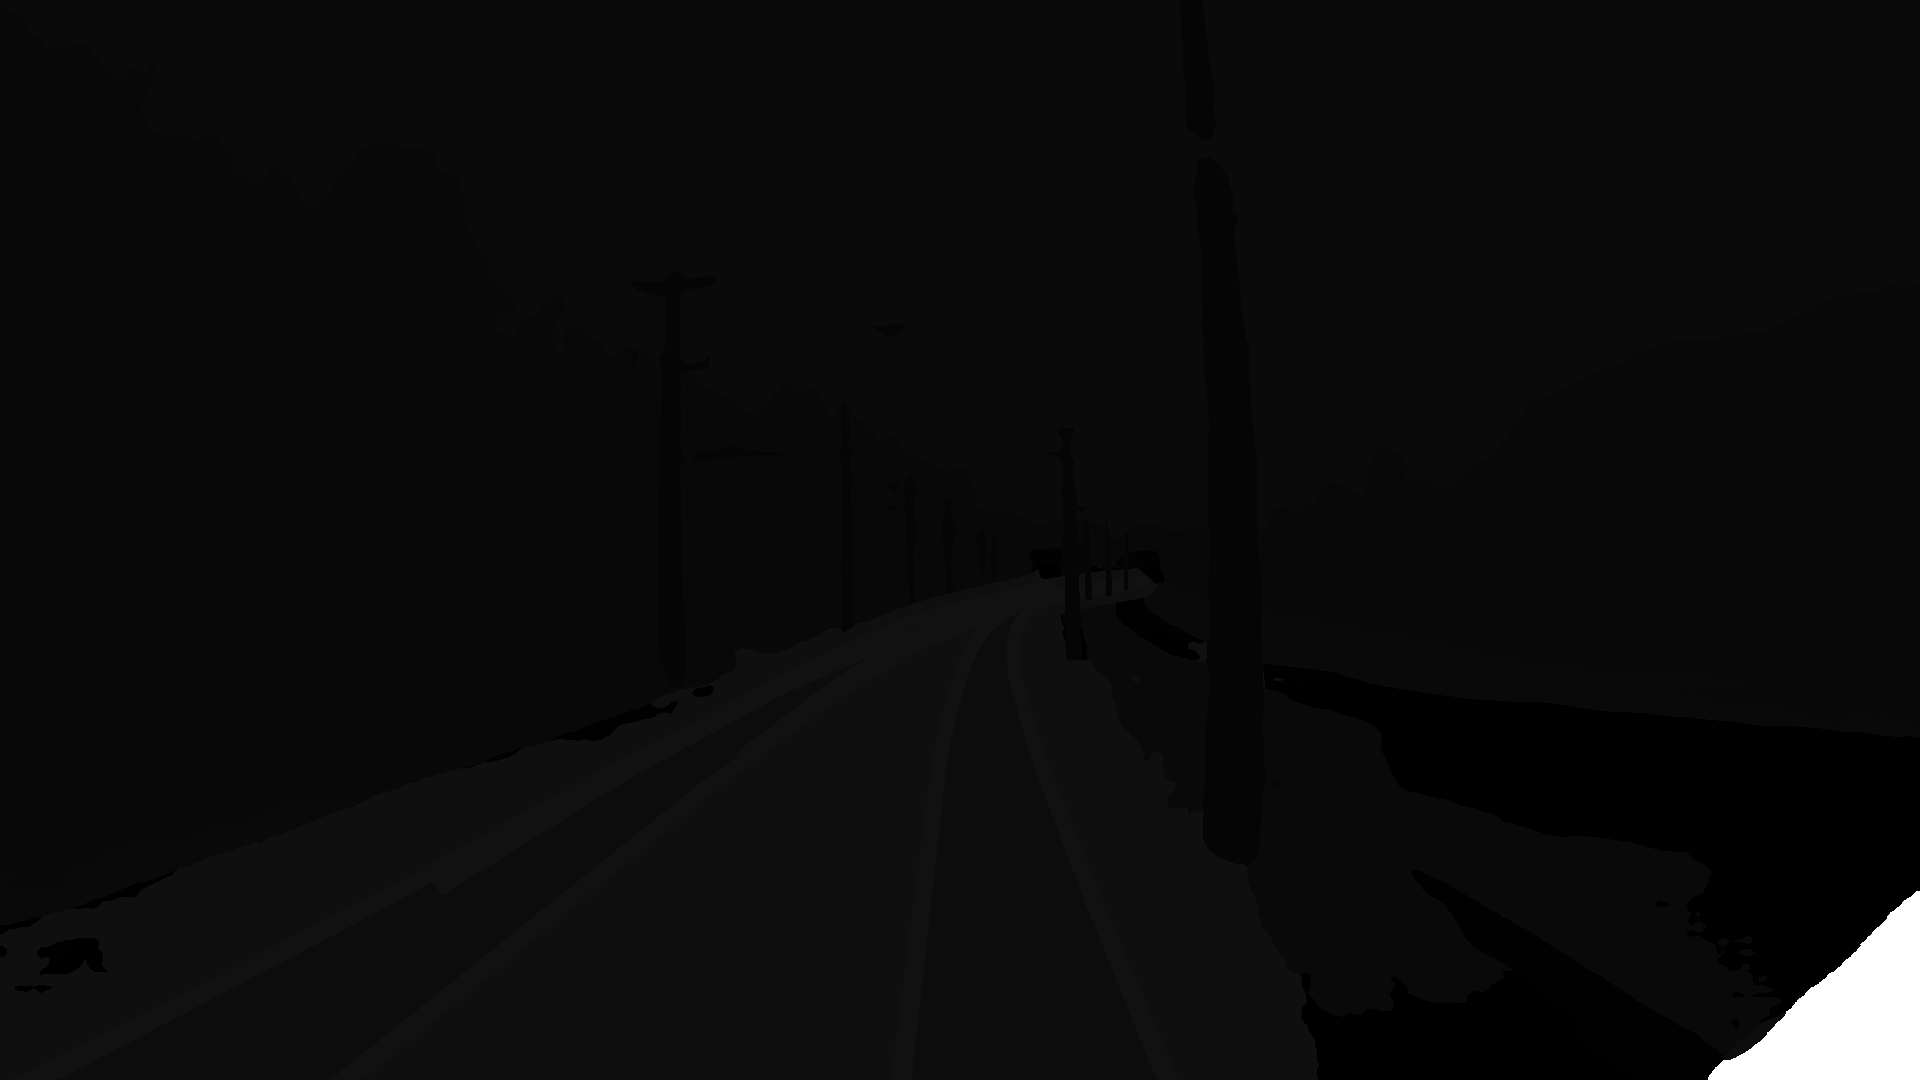

In [ ]:
dataset["data"][0]["semantic_mask_label"]

In [ ]:
import numpy as np

np.array(dataset["data"][0]["semantic_mask_label"]).shape, np.unique(np.array(dataset["data"][0]["semantic_mask_label"]))

((1080, 1920),
 array([  0,   1,   2,   5,   8,   9,  10,  12,  13,  15,  17, 255],
       dtype=uint8))

In [ ]:
# Push to the Hugging Face Model Hub
dataset.push_to_hub("BhavanaMalla/railsem19-semantic", private=True)

Uploading the dataset shards:   0%|          | 0/12 [00:00<?, ?it/s]

Map:   0%|          | 0/709 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/8 [00:00<?, ?ba/s]

Map:   0%|          | 0/709 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/8 [00:00<?, ?ba/s]

Map:   0%|          | 0/709 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/8 [00:00<?, ?ba/s]

Map:   0%|          | 0/709 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/8 [00:00<?, ?ba/s]

Map:   0%|          | 0/708 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/8 [00:00<?, ?ba/s]

Map:   0%|          | 0/708 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/8 [00:00<?, ?ba/s]

Map:   0%|          | 0/708 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/8 [00:00<?, ?ba/s]

Map:   0%|          | 0/708 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/8 [00:00<?, ?ba/s]

Map:   0%|          | 0/708 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/8 [00:00<?, ?ba/s]

Map:   0%|          | 0/708 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/8 [00:00<?, ?ba/s]

Map:   0%|          | 0/708 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/8 [00:00<?, ?ba/s]

Map:   0%|          | 0/708 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/8 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/BhavanaMalla/railsem19-semantic/commit/57d108529c8f0f18a844b8ec3bfd37e589bc57ef', commit_message='Upload dataset', commit_description='', oid='57d108529c8f0f18a844b8ec3bfd37e589bc57ef', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
#commit the panoptic json files

from huggingface_hub import HfApi
api = HfApi()
api.upload_file(
    path_or_fileobj="/content/datasets/railsem19/rs19-config.json",
    path_in_repo="rs19-config.json",
    repo_id="BhavanaMalla/railsem19-semantic",
    repo_type="dataset",
)

CommitInfo(commit_url='https://huggingface.co/datasets/BhavanaMalla/railsem19-semantic/commit/7a843d25cd6dc10e147cfb30ddfa8bd58d9ae97d', commit_message='Upload rs19-config.json with huggingface_hub', commit_description='', oid='7a843d25cd6dc10e147cfb30ddfa8bd58d9ae97d', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
#commit the panoptic json files

from huggingface_hub import HfApi
api = HfApi()
api.upload_file(
    path_or_fileobj="/content/datasets/railsem19/rs19-config.json",
    path_in_repo="rs19-config.json",
    repo_id="BhavanaMalla/railsem19-semantic-split355",
    repo_type="dataset",
)

CommitInfo(commit_url='https://huggingface.co/datasets/BhavanaMalla/railsem19-semantic-split355/commit/2ab5d49a62b546678d2d415f19e7cbc0abd3e718', commit_message='Upload rs19-config.json with huggingface_hub', commit_description='', oid='2ab5d49a62b546678d2d415f19e7cbc0abd3e718', pr_url=None, pr_revision=None, pr_num=None)

In [1]:
#Prepare railsem19-semantic-split355 with info from json as well using pandas
!pip install transformers datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4

In [ ]:
from huggingface_hub import notebook_login
import transformers, datasets
from datasets import load_dataset, Dataset, DatasetDict

import pandas as pd

In [ ]:
notebook_login()

**Now remove the json and create the datasets with expansions of json**

In [ ]:
import datasets
from datasets import Dataset, DatasetDict, Image#Image(decode=False)
from PIL import Image as PILImage
import os
import json
import numpy as np
import pandas as pd


def create_rail_dataset_dict(data_root, split_text_files):
    dataset_dict = {"image": [], "annotation": [], "json":[], "split": []}
    splits = ["train", "val", "test"]
    #/content/datasets/railsem19/jpgs/rs19_val/rs00000.jpg
    #/content/datasets/railsem19/jsons/rs19_val/rs00000.json
    #/content/datasets/railsem19/uint8/rs19_val/rs00000.png
    for split in splits:
        image_dir = os.path.join(data_root, "jpgs", "rs19_val")
        annotation_dir = os.path.join(data_root, "uint8", "rs19_val")
        json_dir = os.path.join(data_root, "jsons", "rs19_val")

        # Get the set of images for the current split
        split_images = split_text_files.get(split, set())

        # Iterate over cities and images in the split
        for image_file in os.listdir(image_dir):
            # Check if the image is in the split's text file
            if os.path.splitext(image_file)[0] in split_images:
                image_path = os.path.join(image_dir, image_file)
                annotation_file = image_file.replace(".jpg", ".png")
                annotation_path = os.path.join(annotation_dir, annotation_file)
                json_file = image_file.replace(".jpg", ".json")
                json_path = os.path.join(json_dir, json_file)

                dataset_dict["image"].append(image_path)
                dataset_dict["annotation"].append(annotation_path)
                dataset_dict["json"].append(json_path)
                dataset_dict["split"].append(split)
    return dataset_dict


def read_split_text_file(file_path):
    with open(file_path, 'r') as file:
        return set(line.strip() for line in file)

# Paths to split-specific text files
train_text_file_path = "/content/datasets/railsem19/train.txt"
val_text_file_path = "/content/datasets/railsem19/val.txt"
test_text_file_path = "/content/datasets/railsem19/test.txt"

# Create a dictionary to map splits to their respective text files
split_text_files = {
    "train": read_split_text_file(train_text_file_path),
    "val": read_split_text_file(val_text_file_path),
    "test": read_split_text_file(test_text_file_path)
}
##print(split_text_files.get("val", set()))
#print(len(split_text_files.get("val", set())))

# Create DatasetDict for Cityscapes
data_root = "/content/datasets/railsem19"
rail_dataset_dict = create_rail_dataset_dict(data_root, split_text_files)

def create_dataset(image_paths, label_paths, json_paths):
    # Sort the list of JSON paths
    sorted_json_paths = sorted(json_paths)
    # Load each JSON file content
    loaded_json_contents = [json.load(open(json_path, "r")) for json_path in sorted_json_paths]
    json_df = pd.DataFrame(loaded_json_contents)
    json_objects = json_df['objects']

    json_df["objLabels"] = json_objects.apply(lambda x: [obj.get('label', None) for obj in x])
    json_df["bbox"] = json_objects.apply(lambda x: [obj.get('boundingbox', None) for obj in x])
    json_df["polygon"] = json_objects.apply(lambda x: [obj.get('polygon', None) for obj in x])
    json_df["polyline"] = json_objects.apply(lambda x: [obj.get('polyline', None) for obj in x])
    json_df["polyline-pair"] = json_objects.apply(lambda x: [obj.get('polyline-pair', None) for obj in x])
    json_df["imgHeight"] = json_df['imgHeight']
    json_df["imgWidth"] = json_df['imgWidth']
    json_df["image_name"] = json_df['frame']

    dataset = Dataset.from_dict({"image": sorted(image_paths),
                                "semantic_mask_label": sorted(label_paths),
                                 "objs_labels": json_df["objLabels"],
                                 "objs_bboxes": json_df["bbox"],
                                 "objs_polygons": json_df["polygon"],
                                 "objs_lpolyline": json_df["polyline"],
                                 "objs_polyline-pair": json_df["polyline-pair"],
                                 "img_Height": json_df["imgHeight"],
                                 "img_Width": json_df["imgWidth"],
                                 "img_Name": json_df["image_name"]
                                 })

    dataset = dataset.cast_column("image", Image())
    dataset = dataset.cast_column("semantic_mask_label", Image())
    return dataset


train_dict = {k: [x for i, x in enumerate(v) if rail_dataset_dict['split'][i]=='train']
                                      for k, v in rail_dataset_dict.items()}
train_dataset = create_dataset(train_dict["image"], train_dict["annotation"],
                               train_dict["json"])
val_dict = {k: [x for i, x in enumerate(v) if rail_dataset_dict['split'][i]=='val']
                                      for k, v in rail_dataset_dict.items()}
val_dataset = create_dataset(val_dict["image"], val_dict["annotation"],
                             val_dict["json"])
test_dict = {k: [x for i, x in enumerate(v) if rail_dataset_dict['split'][i]=='test']
                                      for k, v in rail_dataset_dict.items()}
test_dataset = create_dataset(test_dict["image"], test_dict["annotation"],
                              test_dict["json"])

dataset = DatasetDict({
    "train": train_dataset,
    "validation": val_dataset,
    "test": test_dataset
})

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'semantic_mask_label', 'objs_labels', 'objs_bboxes', 'objs_polygons', 'objs_lpolyline', 'objs_polyline-pair', 'img_Height', 'img_Width', 'img_Name'],
        num_rows: 3000
    })
    validation: Dataset({
        features: ['image', 'semantic_mask_label', 'objs_labels', 'objs_bboxes', 'objs_polygons', 'objs_lpolyline', 'objs_polyline-pair', 'img_Height', 'img_Width', 'img_Name'],
        num_rows: 500
    })
    test: Dataset({
        features: ['image', 'semantic_mask_label', 'objs_labels', 'objs_bboxes', 'objs_polygons', 'objs_lpolyline', 'objs_polyline-pair', 'img_Height', 'img_Width', 'img_Name'],
        num_rows: 500
    })
})

In [ ]:
dataset["test"][0]["img_Name"], dataset["train"][0]["img_Name"], dataset["validation"][0]["img_Name"]

('rs00008', 'rs00001', 'rs00033')

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
# Push to the Hugging Face Model Hub
dataset.push_to_hub("BhavanaMalla/railsem19-semantic-split355-expanded", private=True)

Uploading the dataset shards:   0%|          | 0/4 [00:00<?, ?it/s]

Map:   0%|          | 0/750 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/8 [00:00<?, ?ba/s]

Map:   0%|          | 0/750 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/8 [00:00<?, ?ba/s]

Map:   0%|          | 0/750 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/8 [00:00<?, ?ba/s]

Map:   0%|          | 0/750 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/8 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/5 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/5 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/BhavanaMalla/railsem19-semantic-split355-expanded/commit/98d44beea2717481f49e7dfd69d22f91a97f6e71', commit_message='Upload dataset', commit_description='', oid='98d44beea2717481f49e7dfd69d22f91a97f6e71', pr_url=None, pr_revision=None, pr_num=None)

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!cp -r /content/drive/MyDrive/Colab\ Notebooks/Master\ Thesis/Data/railsem19/rs19_val.zip .

In [12]:
import zipfile
import os

# Define the zip file path and extraction path
zip_file_path = "/content/rs19_val.zip"
extraction_path = "/content/datasets/railsem19"

# Create the extraction directory if it doesn't exist
os.makedirs(extraction_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

print("Unzipping completed.")


Unzipping completed.


In [ ]:
import datasets
from datasets import Dataset, DatasetDict, Image
from PIL import Image as PILImage
import os
import json
import numpy as np


def create_rail_dataset_dict(data_root):
    dataset_dict = {"image": [], "annotation": [], "json":[]}
    #/content/datasets/railsem19/jpgs/rs19_val/rs00000.jpg
    #/content/datasets/railsem19/jsons/rs19_val/rs00000.json
    #/content/datasets/railsem19/uint8/rs19_val/rs00000.png
    image_dir = os.path.join(data_root, "jpgs", "rs19_val")
    annotation_dir = os.path.join(data_root, "uint8", "rs19_val")
    json_dir = os.path.join(data_root, "jsons", "rs19_val")

    # Iterate over cities and images in the split
    for image_file in os.listdir(image_dir):
        image_path = os.path.join(image_dir, image_file)
        annotation_file = image_file.replace(".jpg", ".png")
        annotation_path = os.path.join(annotation_dir, annotation_file)
        json_file = image_file.replace(".jpg", ".json")
        json_path = os.path.join(json_dir, json_file)

        dataset_dict["image"].append(image_path)
        dataset_dict["annotation"].append(annotation_path)
        dataset_dict["json"].append(json_path)
    return dataset_dict

# Create DatasetDict for Cityscapes
data_root = "/content/datasets/railsem19"
rail_dataset_dict = create_rail_dataset_dict(data_root)

def create_dataset(image_paths, label_paths, json_paths):
    # Sort the list of JSON paths
    sorted_json_paths = sorted(json_paths)
    # Load each JSON file content
    loaded_json_contents = [json.load(open(json_path, "r")) for json_path in sorted_json_paths]
    json_df = pd.DataFrame(loaded_json_contents)
    json_objects = json_df['objects']

    json_df["objLabels"] = json_objects.apply(lambda x: [obj.get('label', None) for obj in x])
    json_df["bbox"] = json_objects.apply(lambda x: [obj.get('boundingbox', None) for obj in x])
    json_df["polygon"] = json_objects.apply(lambda x: [obj.get('polygon', None) for obj in x])
    json_df["polyline"] = json_objects.apply(lambda x: [obj.get('polyline', None) for obj in x])
    json_df["polyline-pair"] = json_objects.apply(lambda x: [obj.get('polyline-pair', None) for obj in x])
    json_df["imgHeight"] = json_df['imgHeight']
    json_df["imgWidth"] = json_df['imgWidth']
    json_df["image_name"] = json_df['frame']

    dataset = Dataset.from_dict({"image": sorted(image_paths),
                                "semantic_mask_label": sorted(label_paths),
                                 "objs_labels": json_df["objLabels"],
                                 "objs_bboxes": json_df["bbox"],
                                 "objs_polygons": json_df["polygon"],
                                 "objs_lpolyline": json_df["polyline"],
                                 "objs_polyline-pair": json_df["polyline-pair"],
                                 "img_Height": json_df["imgHeight"],
                                 "img_Width": json_df["imgWidth"],
                                 "img_Name": json_df["image_name"]
                                 })

    dataset = dataset.cast_column("image", Image())
    dataset = dataset.cast_column("semantic_mask_label", Image())
    return dataset

dataset = create_dataset(rail_dataset_dict["image"], rail_dataset_dict["annotation"], rail_dataset_dict["json"])

dataset = DatasetDict({"data": dataset,})

In [ ]:
dataset

DatasetDict({
    data: Dataset({
        features: ['image', 'semantic_mask_label', 'objs_labels', 'objs_bboxes', 'objs_polygons', 'objs_lpolyline', 'objs_polyline-pair', 'img_Height', 'img_Width', 'img_Name'],
        num_rows: 8500
    })
})

In [ ]:
dataset["data"]

Dataset({
    features: ['image', 'semantic_mask_label', 'objs_labels', 'objs_bboxes', 'objs_polygons', 'objs_lpolyline', 'objs_polyline-pair', 'img_Height', 'img_Width', 'img_Name'],
    num_rows: 8500
})

In [ ]:
# Push to the Hugging Face Model Hub
dataset.push_to_hub("BhavanaMalla/railsem19-semantic-expanded", private=True)

Uploading the dataset shards:   0%|          | 0/12 [00:00<?, ?it/s]

Map:   0%|          | 0/709 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/8 [00:00<?, ?ba/s]

Map:   0%|          | 0/709 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/8 [00:00<?, ?ba/s]

Map:   0%|          | 0/709 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/8 [00:00<?, ?ba/s]

Map:   0%|          | 0/709 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/8 [00:00<?, ?ba/s]

Map:   0%|          | 0/708 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/8 [00:00<?, ?ba/s]

Map:   0%|          | 0/708 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/8 [00:00<?, ?ba/s]

Map:   0%|          | 0/708 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/8 [00:00<?, ?ba/s]

Map:   0%|          | 0/708 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/8 [00:00<?, ?ba/s]

Map:   0%|          | 0/708 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/8 [00:00<?, ?ba/s]

Map:   0%|          | 0/708 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/8 [00:00<?, ?ba/s]

Map:   0%|          | 0/708 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/8 [00:00<?, ?ba/s]

Map:   0%|          | 0/708 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/8 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/BhavanaMalla/railsem19-semantic-expanded/commit/b088334582574ac6e3b021e60aa2d8c5dafe9bdd', commit_message='Upload dataset', commit_description='', oid='b088334582574ac6e3b021e60aa2d8c5dafe9bdd', pr_url=None, pr_revision=None, pr_num=None)

**Creating id2label and label2id from config json file and pushing to hub**

In [ ]:
#Create id2label for rail19sem dataset with 19 classes from json
import huggingface_hub
from huggingface_hub import HfApi

config_file = hf_hub_download(repo_id="BhavanaMalla/railsem19-semantic-split355",
                filename="rs19-config.json",
                repo_type="dataset",
                local_dir="/content")

with open(config_file, "r") as f:
    config_json = json.load(f)
labels = config_json["labels"]

extract_labels = []
readable_labels = []
color_palette = []
for label in labels:
    extract_labels.append(label["name"])
    color_palette.append(label["color"])
    readable_labels.append(label["readable"])

id2label = {idx: label for idx, label in enumerate(extract_labels)}
label2id = {label: idx for idx, label in enumerate(extract_labels)}

label_info = {"id2label": id2label,
              "label2id": label2id,
              "labels": extract_labels,
              "color_palette": color_palette,
              "readable_labels": readable_labels}

mypath = Path("/content")
with open(mypath / "labels_info.json", "w") as f:
    json.dump(label_info, f)

api = HfApi()
api.upload_file(
    path_or_fileobj="/content/labels_info.json",
    path_in_repo="labels_info.json",
    repo_id="BhavanaMalla/railsem19-semantic-split355-expanded",#asend to all repos of railSem19
    repo_type="dataset",
)

In [ ]:
railsem_ds = load_dataset("BhavanaMalla/railsem19-semantic-split355-expanded")

Generating train split:   0%|          | 0/3000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/500 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/500 [00:00<?, ? examples/s]

In [ ]:
import numpy as np
type(railsem_ds["validation"]["objs_labels"]), len((railsem_ds["validation"]["objs_labels"])), railsem_ds["validation"]["objs_labels"][0]

(list,
 500,
 ['switch-unknown',
  'train-car',
  'pole',
  'pole',
  'pole',
  'pole',
  'rail',
  'rail',
  'rail',
  'guard-rail',
  'guard-rail'])

In [ ]:
import numpy as np

def get_unique_classes_numpy(list_of_lists):
    flattened_strings = np.concatenate(list_of_lists)
    unique_strings = np.unique(flattened_strings)
    return unique_strings.tolist()

total_labels = railsem_ds["train"]["objs_labels"]
classes = get_unique_classes_numpy(total_labels)

classes, len(classes)

(['buffer-stop',
  'car',
  'crossing',
  'fence',
  'guard-rail',
  'person',
  'person-group',
  'platform',
  'pole',
  'rail',
  'rail-occluder',
  'switch-indicator',
  'switch-left',
  'switch-right',
  'switch-static',
  'switch-unknown',
  'track-sign-front',
  'track-signal-back',
  'track-signal-front',
  'train-car',
  'truck'],
 21)

In [ ]:
total_labels = railsem_ds["validation"]["objs_labels"]
classes = get_unique_classes_numpy(total_labels)

classes, len(classes)

(['buffer-stop',
  'car',
  'crossing',
  'fence',
  'guard-rail',
  'person',
  'person-group',
  'platform',
  'pole',
  'rail',
  'rail-occluder',
  'switch-indicator',
  'switch-left',
  'switch-right',
  'switch-static',
  'switch-unknown',
  'track-sign-front',
  'track-signal-back',
  'track-signal-front',
  'train-car'],
 20)

In [ ]:
total_labels = railsem_ds["test"]["objs_labels"]
classes = get_unique_classes_numpy(total_labels)

classes, len(classes)

(['buffer-stop',
  'car',
  'crossing',
  'fence',
  'guard-rail',
  'person',
  'person-group',
  'platform',
  'pole',
  'rail',
  'rail-occluder',
  'switch-indicator',
  'switch-left',
  'switch-right',
  'switch-static',
  'switch-unknown',
  'track-sign-front',
  'track-signal-back',
  'track-signal-front',
  'train-car',
  'truck'],
 21)

In [ ]:
# whole dataset classes check
railsem_ds = load_dataset("BhavanaMalla/railsem19-semantic-expanded")

Generating data split:   0%|          | 0/8500 [00:00<?, ? examples/s]

In [ ]:
import numpy as np

def get_unique_classes_numpy(list_of_lists):
    flattened_strings = np.concatenate(list_of_lists)
    unique_strings = np.unique(flattened_strings)
    return unique_strings.tolist()

In [ ]:
total_labels = railsem_ds["data"]["objs_labels"]
classes = get_unique_classes_numpy(total_labels)

classes, len(classes)

(['buffer-stop',
  'car',
  'crossing',
  'fence',
  'guard-rail',
  'person',
  'person-group',
  'platform',
  'pole',
  'rail',
  'rail-occluder',
  'switch-indicator',
  'switch-left',
  'switch-right',
  'switch-static',
  'switch-unknown',
  'track-sign-front',
  'track-signal-back',
  'track-signal-front',
  'train-car',
  'truck'],
 21)

**Self practiced to create a df from json without expansion from hf but this is fialing for train set bcz of using pd Dataframes and it is crashing memory** No need to use this.. Just pasted for reference

In [ ]:
railsem_ds = load_dataset("BhavanaMalla/railsem19-semantic-split355")

In [ ]:
#railsem_ds["train"]["json"][:]

In [ ]:
#railsem_ds["train"]["json"][0]["objects"][:]

In [ ]:
import pandas as pd

# Create a dataframe with image, annotation and json
df = pd.DataFrame(railsem_ds["validation"])

In [ ]:
df.head()

In [ ]:
jsons = df['json'].tolist()

In [ ]:
type(jsons)

list

In [ ]:
type(jsons[:2])

list

In [ ]:
type(jsons[0])

dict

In [ ]:
jsons[0].keys()

dict_keys(['frame', 'imgHeight', 'imgWidth', 'objects'])

In [ ]:
#conver the json column to a seperate df
json_df = pd.DataFrame(jsons)

In [ ]:
json_df.head()

,frame,imgHeight,imgWidth,objects
0,rs00033,1080,1920,"[{'boundingbox': [1145, 648, 1192, 668], 'labe..."
1,rs00038,1080,1920,"[{'boundingbox': None, 'label': 'rail', 'polyg..."
2,rs00042,1080,1920,"[{'boundingbox': [949, 374, 959, 411], 'label'..."
3,rs00046,1080,1920,"[{'boundingbox': [1454, 514, 1577, 642], 'labe..."
4,rs00053,1080,1920,"[{'boundingbox': [521, 243, 632, 408], 'label'..."


In [ ]:
json_df["objects"]

0      [{'boundingbox': [1145, 648, 1192, 668], 'labe...
1      [{'boundingbox': None, 'label': 'rail', 'polyg...
2      [{'boundingbox': [949, 374, 959, 411], 'label'...
3      [{'boundingbox': [1454, 514, 1577, 642], 'labe...
4      [{'boundingbox': [521, 243, 632, 408], 'label'...
                             ...                        
495    [{'boundingbox': [849, 673, 1132, 1079], 'labe...
496    [{'boundingbox': [889, 611, 928, 646], 'label'...
497    [{'boundingbox': [843, 441, 853, 468], 'label'...
498    [{'boundingbox': [1511, 678, 1551, 754], 'labe...
499    [{'boundingbox': [1022, 699, 1053, 715], 'labe...
Name: objects, Length: 500, dtype: object

In [ ]:
json_df["objects"][0][0].keys()

dict_keys(['boundingbox', 'label', 'polygon', 'polyline', 'polyline-pair'])

In [ ]:
json_df["objects"][0][1]["polygon"]

[[972, 588],
 [937, 588],
 [926, 591],
 [919, 595],
 [913, 635],
 [894, 638],
 [890, 646],
 [827, 663],
 [811, 665],
 [796, 662],
 [782, 662],
 [760, 660],
 [746, 660],
 [730, 670],
 [713, 685],
 [658, 688],
 [603, 705],
 [549, 729],
 [527, 727],
 [498, 725],
 [443, 726],
 [416, 741],
 [391, 746],
 [375, 751],
 [358, 747],
 [185, 786],
 [149, 803],
 [124, 799],
 [0, 832],
 [0, 1079],
 [277, 1079],
 [495, 956],
 [896, 703],
 [936, 688],
 [962, 681],
 [978, 668],
 [980, 641],
 [980, 627],
 [980, 616],
 [980, 610],
 [980, 599]]

In [ ]:
json_df["objects"][0][9]["polyline"]

[[1173, 780],
 [1173, 779],
 [1173, 779],
 [1173, 778],
 [1172, 778],
 [1172, 778],
 [1172, 777],
 [1172, 777],
 [1172, 776],
 [1172, 776],
 [1172, 775],
 [1172, 775],
 [1172, 774],
 [1172, 774],
 [1172, 773],
 [1171, 773],
 [1171, 772],
 [1171, 772],
 [1171, 771],
 [1171, 771],
 [1171, 770],
 [1171, 770],
 [1171, 769],
 [1171, 769],
 [1171, 768],
 [1170, 768],
 [1170, 767],
 [1170, 767],
 [1170, 766],
 [1170, 766],
 [1170, 765],
 [1170, 765],
 [1170, 764],
 [1170, 764],
 [1170, 763],
 [1169, 763],
 [1169, 762],
 [1169, 762],
 [1169, 761],
 [1169, 761],
 [1169, 760],
 [1169, 760],
 [1169, 759],
 [1169, 759],
 [1169, 758],
 [1169, 758],
 [1168, 757],
 [1168, 757],
 [1168, 756],
 [1168, 756],
 [1168, 755],
 [1168, 755],
 [1168, 754],
 [1168, 754],
 [1168, 753],
 [1168, 753],
 [1167, 752],
 [1167, 752],
 [1167, 751],
 [1167, 751],
 [1167, 750],
 [1167, 750],
 [1167, 749],
 [1167, 749],
 [1167, 748],
 [1167, 748],
 [1167, 747],
 [1166, 747],
 [1166, 746],
 [1166, 746],
 [1166, 745],
 [1166

In [ ]:
json_df["objects"][0][8]["polyline-pair"]

[[[1315, 1079],
  [1313, 1075],
  [1311, 1071],
  [1309, 1068],
  [1306, 1064],
  [1304, 1060],
  [1302, 1056],
  [1300, 1053],
  [1298, 1049],
  [1296, 1045],
  [1294, 1041],
  [1292, 1037],
  [1290, 1034],
  [1288, 1030],
  [1285, 1026],
  [1283, 1022],
  [1281, 1019],
  [1279, 1015],
  [1278, 1011],
  [1276, 1007],
  [1274, 1003],
  [1272, 999],
  [1270, 995],
  [1268, 991],
  [1266, 987],
  [1264, 984],
  [1263, 980],
  [1261, 976],
  [1259, 972],
  [1257, 968],
  [1255, 964],
  [1253, 960],
  [1251, 956],
  [1250, 952],
  [1248, 948],
  [1246, 945],
  [1244, 941],
  [1242, 937],
  [1240, 933],
  [1238, 929],
  [1236, 925],
  [1235, 921],
  [1233, 917],
  [1231, 913],
  [1229, 909],
  [1227, 906],
  [1225, 902],
  [1223, 898],
  [1222, 894],
  [1220, 890],
  [1218, 886],
  [1216, 882],
  [1214, 878],
  [1212, 874],
  [1210, 870],
  [1209, 867],
  [1207, 863],
  [1205, 858],
  [1204, 854],
  [1203, 850],
  [1201, 846],
  [1200, 842],
  [1199, 838],
  [1197, 834],
  [1196, 830],
  [1

In [ ]:
json_df['labels'] = json_df['objects'].apply(lambda x: [obj['label'] for obj in x])
df["labels"] = json_df['objects'].apply(lambda x: [obj['label'] for obj in x])

In [ ]:
json_df["labels"].head()

0    [switch-unknown, train-car, pole, pole, pole, ...
1                                               [rail]
2    [track-signal-front, track-signal-front, track...
3    [track-sign-front, switch-right, rail, rail, r...
4    [track-signal-back, track-signal-back, switch-...
Name: labels, dtype: object

In [ ]:
df["labels"].head()

0    [switch-unknown, train-car, pole, pole, pole, ...
1                                               [rail]
2    [track-signal-front, track-signal-front, track...
3    [track-sign-front, switch-right, rail, rail, r...
4    [track-signal-back, track-signal-back, switch-...
Name: labels, dtype: object

In [ ]:
import pandas as pd

# Create a dataframe with image, annotation and json
df = pd.DataFrame(railsem_ds["validation"])
jsons = df['json'].tolist()

#convert the json column to a seperate df
json_df = pd.DataFrame(jsons)

#generate labels present in each image
df["objLabels"] = json_df['objects'].apply(lambda x: [obj['label'] for obj in x])
df["bbox"] = json_df['objects'].apply(lambda x: [obj['boundingbox'] for obj in x])
df["polygon"] = json_df['objects'].apply(lambda x: [obj['polygon'] for obj in x])
df["polyline"] = json_df['objects'].apply(lambda x: [obj['polyline'] for obj in x])
df["polyline-pair"] = json_df['objects'].apply(lambda x: [obj['polyline-pair'] for obj in x])
df["imgHeight"] = json_df['imgHeight']
df["imgWidth"] = json_df['imgWidth']
df["image_name"] = json_df['frame']
df.drop("json", axis=1, inplace=True)

In [ ]:
df.head()

,image,semantic_mask_label,objLabels,imgHeight,imgWidth,image_name,bbox,polygon,polyline,polyline-pair
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,<PIL.PngImagePlugin.PngImageFile image mode=L ...,"[switch-unknown, train-car, pole, pole, pole, ...",1080,1920,rs00033,"[[1145, 648, 1192, 668], None, None, None, Non...","[None, [[972, 588], [937, 588], [926, 591], [9...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, [[[1918, ..."
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,<PIL.PngImagePlugin.PngImageFile image mode=L ...,[rail],1080,1920,rs00038,[None],[None],[None],"[[[[975, 1078], [973, 1072], [972, 1067], [971..."
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,<PIL.PngImagePlugin.PngImageFile image mode=L ...,"[track-signal-front, track-signal-front, track...",1080,1920,rs00042,"[[949, 374, 959, 411], [989, 379, 1002, 417], ...","[None, None, None, None, None, None, None]","[None, None, None, None, None, None, None]","[None, None, None, None, None, [[[233, 1074], ..."
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,<PIL.PngImagePlugin.PngImageFile image mode=L ...,"[track-sign-front, switch-right, rail, rail, r...",1080,1920,rs00046,"[[1454, 514, 1577, 642], [1201, 437, 1257, 468...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, [[1917, 6...","[None, None, [[[1085, 1079], [1085, 1071], [10..."
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,<PIL.PngImagePlugin.PngImageFile image mode=L ...,"[track-signal-back, track-signal-back, switch-...",1080,1920,rs00053,"[[521, 243, 632, 408], [1421, 232, 1524, 396],...","[None, None, None, [[1035, 473], [1038, 601], ...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, [[[..."


In [ ]:
df["bbox"][0], df["objLabels"][0]

([[1145, 648, 1192, 668],
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 ['switch-unknown',
  'train-car',
  'pole',
  'pole',
  'pole',
  'pole',
  'rail',
  'rail',
  'rail',
  'guard-rail',
  'guard-rail'])

In [ ]:
# import transformers
# from datasets import Dataset, DatasetDict

# train_dataset = Dataset.from_pandas(train_df)
# val_dataset = Dataset.from_pandas(val_df)
# test_dataset = Dataset.from_pandas(test_df)


# # Create a DatasetDict
# dataset_dict = DatasetDict({
#     "train": train_dataset,
#     "validation": val_dataset,
#     "test": test_dataset
# })

# # Print the DatasetDict
# print(dataset_dict)
